# Linear Classifiers in Python

### KNN classification
In this exercise you'll explore a subset of the Large Movie Review Dataset. The variables X_train, X_test, y_train, and y_test are already loaded into the environment. The X variables contain features based on the words in the movie reviews, and the y variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the Scikit-Learn Cheat Sheet and keep it handy!

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

X, y = newsgroups.data, newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test[0])
print("Prediction for test example 0:", pred)

Prediction for test example 0: [8]


### Exercise
Exercise
Running LogisticRegression and SVC
In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.

In [4]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.9666666666666667
0.9970304380103935
0.9933333333333333


### Sentiment analysis for movie reviews
In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).

In [5]:
import pandas as pd
import numpy as np

In [6]:
imdb = pd.read_csv('datasets/IMDB_sample.csv')

In [7]:
reviews = imdb.iloc[:1500, 1]
target_reviews = imdb.iloc[:1500, -1]

In [8]:


from sklearn.feature_extraction.text import TfidfVectorizer

get_features = TfidfVectorizer().fit(reviews)

reviews_tfidf = get_features.transform(reviews)




In [9]:
X = reviews_tfidf
y = target_reviews

In [10]:
from sklearn.linear_model import LogisticRegression
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = ["LOVED IT! This movie was amazing. Top 10 this year."]
review1_features = get_features.transform(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])



Review: ['LOVED IT! This movie was amazing. Top 10 this year.']
Probability of positive review: 0.557544647015498


In [11]:
# Predict sentiment for a poor review
review2 = ["Total junk! I'll never watch a film by that director again, no matter how good the reviews."]
review2_features = get_features.transform(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Review: ["Total junk! I'll never watch a film by that director again, no matter how good the reviews."]
Probability of positive review: 0.40160347400760404


In [12]:
y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])


In [13]:
 X =  np.array([[11.45,  2.4 ],
       [13.62,  4.95],
       [13.88,  1.89],
       [12.42,  2.55],
       [12.81,  2.31],
       [12.58,  1.29],
       [13.83,  1.57],
       [13.07,  1.5 ],
       [12.7 ,  3.55],
       [13.77,  1.9 ],
       [12.84,  2.96],
       [12.37,  1.63],
       [13.51,  1.8 ],
       [13.87,  1.9 ],
       [12.08,  1.39],
       [13.58,  1.66],
       [13.08,  3.9 ],
       [11.79,  2.13],
       [12.45,  3.03],
       [13.68,  1.83],
       [13.52,  3.17],
       [13.5 ,  3.12],
       [12.87,  4.61],
       [14.02,  1.68],
       [12.29,  3.17],
       [12.08,  1.13],
       [12.7 ,  3.87],
       [11.03,  1.51],
       [13.32,  3.24],
       [14.13,  4.1 ],
       [13.49,  1.66],
       [11.84,  2.89],
       [13.05,  2.05],
       [12.72,  1.81],
       [12.82,  3.37],
       [13.4 ,  4.6 ],
       [14.22,  3.99],
       [13.72,  1.43],
       [12.93,  2.81],
       [11.64,  2.06],
       [12.29,  1.61],
       [11.65,  1.67],
       [13.28,  1.64],
       [12.93,  3.8 ],
       [13.86,  1.35],
       [11.82,  1.72],
       [12.37,  1.17],
       [12.42,  1.61],
       [13.9 ,  1.68],
       [14.16,  2.51]])

### Visualizing decision boundaries
In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into X, along with binary labels in y.

In [52]:
from external import classifier_plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')

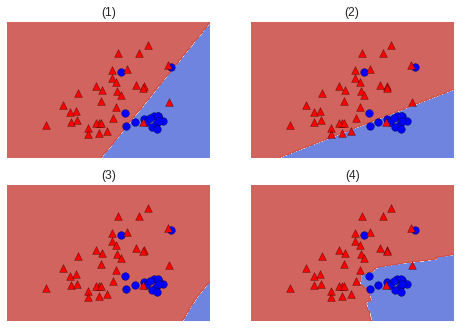

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
classifier_plot.plot_4_classifiers(X, y, classifiers)
plt.show()

In [16]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

In [17]:
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,-1, -1, -1])

### Changing the model coefficients
When you call fit with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with fit), and visualize the resulting classifiers.

A 2D dataset is already loaded into the environment as X and y, along with a linear classifier object model.

In [18]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

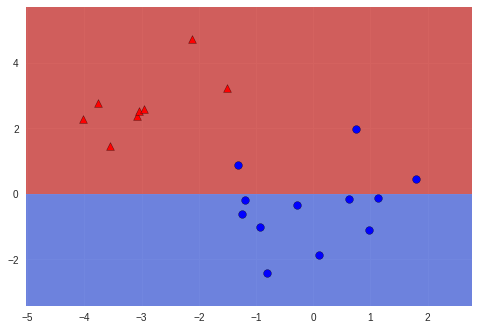

Number of errors: 3


In [19]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

 # Plot the data and decision boundary
classifier_plot.plot_classifier(X,y,model)


# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

### Minimizing a loss function
In this exercise you'll implement linear regression "from scratch" using scipy.optimize.minimize.

We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

In [20]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [21]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr)

[-0.10279794  0.24559517]
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)


### Comparing the logistic and hinge losses
In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

The loss function diagram from the video is shown on the right.

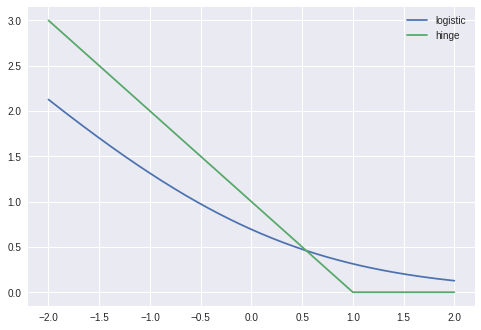

In [22]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

### Implementing logistic regression
This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!).

The log_loss() function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

In [23]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(y)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[-0.41509486  0.88447548]
[[-0.41509756  0.88448004]]


### Regularized logistic regression
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

In [24]:
heart = pd.read_csv('datasets/heart_disease.csv')

In [25]:
heart.dropna(axis=0, inplace=True)

In [26]:
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

In [27]:


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

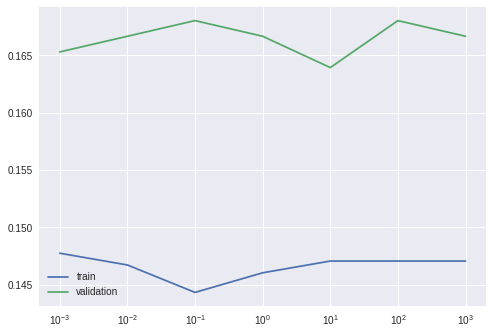

In [28]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

### Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l2')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}
Total number of features: 15
Number of selected features: 15


### Exercise
Exercise
Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

imdb = pd.read_csv('datasets/IMDB_sample.csv')

reviews = imdb.iloc[:1500, 1]
target_reviews = imdb.iloc[:1500, -1]


get_features = TfidfVectorizer().fit(reviews)

reviews_tfidf = get_features.transform(reviews)


X = reviews_tfidf
y = target_reviews

In [32]:
from sklearn.linear_model import LogisticRegression
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = ["LOVED IT! This movie was amazing. Top 10 this year."]
review1_features = get_features.transform(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

Review: ['LOVED IT! This movie was amazing. Top 10 this year.']
Probability of positive review: 0.557544647015498


In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer

get_features = TfidfVectorizer().fit(reviews)

reviews_tfidf = get_features.transform(reviews)



In [34]:
vocab = get_features.get_feature_names()

In [35]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(15):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(15):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: great, and, best, well, excellent, very, fun, show, its, as, see, wonderful, family, his, think, 

Most negative words: bad, worst, no, waste, awful, nothing, boring, this, even, terrible, horrible, was, script, poor, lame, 



### Regularization and probabilities
In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

In [36]:
X = np.array([[ 1.78862847,  0.43650985],
           [ 0.09649747, -1.8634927 ],
           [-0.2773882 , -0.35475898],
           [-3.08274148,  2.37299932],
           [-3.04381817,  2.52278197],
           [-1.31386475,  0.88462238],
           [-2.11868196,  4.70957306],
           [-2.94996636,  2.59532259],
           [-3.54535995,  1.45352268],
           [ 0.98236743, -1.10106763],
           [-1.18504653, -0.2056499 ],
           [-1.51385164,  3.23671627],
           [-4.02378514,  2.2870068 ],
           [ 0.62524497, -0.16051336],
           [-3.76883635,  2.76996928],
           [ 0.74505627,  1.97611078],
           [-1.24412333, -0.62641691],
           [-0.80376609, -2.41908317],
           [-0.92379202, -1.02387576],
           [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

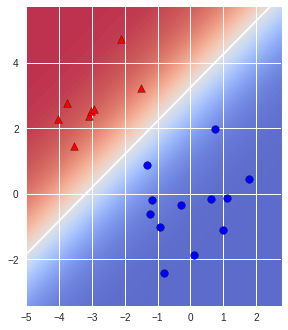

Maximum predicted probability 0.9973143426717812


In [37]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
classifier_plot.plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

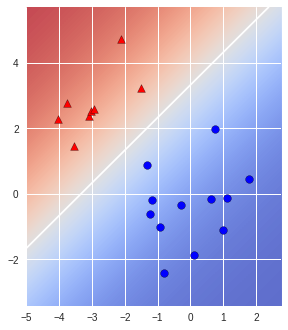

Maximum predicted probability 0.9352061679007128


In [38]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
classifier_plot.plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

### Visualizing easy and difficult examples
In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

<class 'numpy.ndarray'>


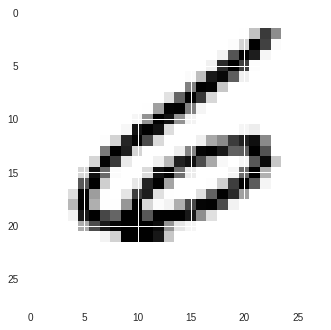

In [39]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'datasets/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()



In [40]:
X = digits[:, 1:]
y = digits[:, 0]

In [41]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))



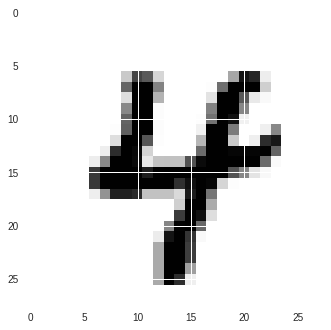

In [42]:
im = digits[proba_inds[-1], 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


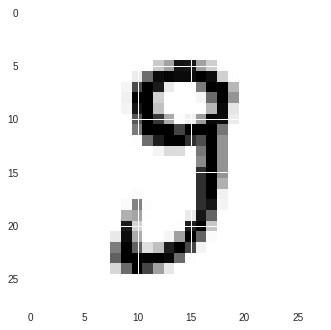

In [43]:
im = digits[proba_inds[0], 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### Fitting multi-class logistic regression
In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into X_train, y_train, X_test, and y_test.

In [44]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.853967168262654


ValueError: X has 64 features per sample; expecting 15

### Visualizing multi-class logistic regression
In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into X_train and y_train. The two logistic regression objects,lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted.

Notice that lr_ovr never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

In [ ]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C= 100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

### One-vs-rest SVM
As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into X_train, y_train, X_test, and y_test .

Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

In [ ]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

### Effect of removing examples
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into X and y (first two features only). (Note: we specify lims in plot_classifier() so that the two plots are forced to use the same axis limits and can be compared directly.)

In [45]:
X = np.array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.24,  3.98],
       [13.05,  1.77],
       [14.21,  4.04],
       [14.38,  3.59],
       [13.9 ,  1.68],
       [14.1 ,  2.02],
       [13.94,  1.73],
       [13.05,  1.73],
       [13.83,  1.65],
       [13.82,  1.75],
       [13.77,  1.9 ],
       [13.74,  1.67],
       [13.56,  1.73],
       [14.22,  1.7 ],
       [13.29,  1.97],
       [13.72,  1.43],
       [12.37,  0.94],
       [12.33,  1.1 ],
       [12.64,  1.36],
       [13.67,  1.25],
       [12.37,  1.13],
       [12.17,  1.45],
       [12.37,  1.21],
       [13.11,  1.01],
       [12.37,  1.17],
       [13.34,  0.94],
       [12.21,  1.19],
       [12.29,  1.61],
       [13.86,  1.51],
       [13.49,  1.66],
       [12.99,  1.67],
       [11.96,  1.09],
       [11.66,  1.88],
       [13.03,  0.9 ],
       [11.84,  2.89],
       [12.33,  0.99],
       [12.7 ,  3.87],
       [12.  ,  0.92],
       [12.72,  1.81],
       [12.08,  1.13],
       [13.05,  3.86],
       [11.84,  0.89],
       [12.67,  0.98],
       [12.16,  1.61],
       [11.65,  1.67],
       [11.64,  2.06],
       [12.08,  1.33],
       [12.08,  1.83],
       [12.  ,  1.51],
       [12.69,  1.53],
       [12.29,  2.83],
       [11.62,  1.99],
       [12.47,  1.52],
       [11.81,  2.12],
       [12.29,  1.41],
       [12.37,  1.07],
       [12.29,  3.17],
       [12.08,  2.08],
       [12.6 ,  1.34],
       [12.34,  2.45],
       [11.82,  1.72],
       [12.51,  1.73],
       [12.42,  2.55],
       [12.25,  1.73],
       [12.72,  1.75],
       [12.22,  1.29],
       [11.61,  1.35],
       [11.46,  3.74],
       [12.52,  2.43],
       [11.76,  2.68],
       [11.41,  0.74],
       [12.08,  1.39],
       [11.03,  1.51],
       [11.82,  1.47],
       [12.42,  1.61],
       [12.77,  3.43],
       [12.  ,  3.43],
       [11.45,  2.4 ],
       [11.56,  2.05],
       [12.42,  4.43],
       [13.05,  5.8 ],
       [11.87,  4.31],
       [12.07,  2.16],
       [12.43,  1.53],
       [11.79,  2.13],
       [12.37,  1.63],
       [12.04,  4.3 ],
       [12.86,  1.35],
       [12.88,  2.99],
       [12.81,  2.31],
       [12.7 ,  3.55],
       [12.51,  1.24],
       [12.6 ,  2.46],
       [12.25,  4.72],
       [12.53,  5.51],
       [13.49,  3.59],
       [12.84,  2.96],
       [12.93,  2.81],
       [13.36,  2.56],
       [13.52,  3.17],
       [13.62,  4.95],
       [12.25,  3.88],
       [13.16,  3.57],
       [13.88,  5.04],
       [12.87,  4.61],
       [13.32,  3.24],
       [13.08,  3.9 ],
       [13.5 ,  3.12],
       [12.79,  2.67],
       [13.11,  1.9 ],
       [13.23,  3.3 ],
       [12.58,  1.29],
       [13.17,  5.19],
       [13.84,  4.12],
       [12.45,  3.03],
       [14.34,  1.68],
       [13.48,  1.67],
       [12.36,  3.83],
       [13.69,  3.26],
       [12.85,  3.27],
       [12.96,  3.45],
       [13.78,  2.76],
       [13.73,  4.36],
       [13.45,  3.7 ],
       [12.82,  3.37],
       [13.58,  2.58],
       [13.4 ,  4.6 ],
       [12.2 ,  3.03],
       [12.77,  2.39],
       [14.16,  2.51],
       [13.71,  5.65],
       [13.4 ,  3.91],
       [13.27,  4.28],
       [13.17,  2.59],
       [14.13,  4.1 ]])



In [46]:
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

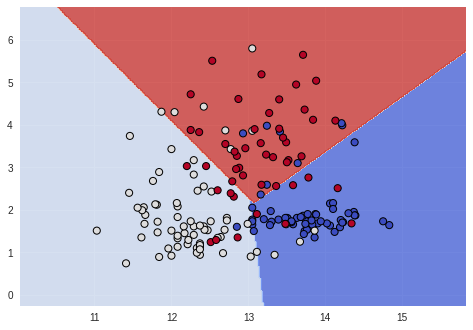

Number of original examples 178
Number of support vectors 81


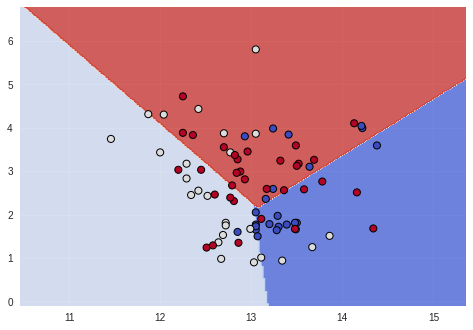

In [57]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
classifier_plot.plot_classifier(X, y, svm)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
classifier_plot.plot_classifier(X_small, y_small, svm_small)

### GridSearchCV warm-up
In the video we saw that increasing the RBF kernel hyperparameter gamma increases training accuracy. In this exercise we'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

In [58]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.1}


### Jointly tuning gamma and C with GridSearchCV
In the previous exercise the best value of gamma was 0.001 using the default value of C, which is 1. In this exercise you'll search for the best combination of C and gamma using GridSearchCV.

As in the previous exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables X_train, y_train, X_test, and y_test. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.

In [64]:
heart = pd.read_csv('datasets/heart_disease.csv')

heart.dropna(axis=0, inplace=True)

X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

In [68]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_valid, y_valid))

Best CV params {'C': 1, 'gamma': 0.0001}
Best CV accuracy 0.8515718299964876
Test accuracy of best grid search hypers: 0.8333333333333334


### Using SGDClassifier
In this final coding exercise, you'll do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using SGDClassifier()

In [69]:
from sklearn.linear_model import SGDClassifier

In [71]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_valid, y_valid))

Best CV params {'alpha': 1, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.8512331104773482
Test accuracy of best grid search hypers: 0.8333333333333334
